<a href="https://colab.research.google.com/github/isaacdemelorocha/ChallengeDataAluraTelecom/blob/main/TelecomX_BR_ISAAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar a biblioteca pandas#
import pandas as pd

In [ ]:
#Ler arquivo
dados = pd.read_json('/content/TelecomX_Data.json')

In [ ]:
#Visualizar arquivo
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
#Consultar informações
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
# Extrair variável 'customer'
dados_customer = pd.json_normalize(data=dados.customer)
dados_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [ ]:
# Extrair variável 'phone'
dados_phone = pd.json_normalize(data=dados.phone)
dados_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [ ]:
# Extrair variável 'internet'
dados_internet = pd.json_normalize(data=dados.internet)
dados_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [ ]:
# Extrair variável 'account'
dados_account = pd.json_normalize(data=dados.account)
dados_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [ ]:
# Remover as colunas com json
dados.drop(columns=['customer', 'phone', 'internet', 'account'], axis=1, inplace=True)

In [ ]:
# Contatenar os dados abertos
dados_abertos = pd.concat([dados, dados_customer, dados_phone, dados_internet, dados_account], axis=1)
dados_abertos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
#Comentar informações
linha, coluna = dados_abertos.shape
print(f'O conjunto de dados possui informações de {linha} clientes e {coluna} variáveis.')

O conjunto de dados possui informações de 7267 clientes e 21 variáveis.


In [ ]:
#Ler dados abertos
dados_abertos.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [ ]:
#Renomear colunas
colunas = {'customerID':'id_cliente', 'Churn':'perda_cliente', 'gender':'genero',
           'SeniorCitizen':'idoso', 'Partner':'parceiro',
           'Dependents':'dependentes', 'tenure':'meses_contrato',
           'PhoneService':'servico_telefonia', 'MultipleLines':'multipas_linhas_telefonicas',
           'InternetService':'provedor_internet', 'OnlineSecurity':'seguranca_online',
           'OnlineBackup':'backup_online', 'DeviceProtection': 'protecao_de_dispositivo',
           'TechSupport':'Suporte_tecnico', 'StreamingTV':'TV_a_cabo', 'StreamingMovies':'streaming_filmes',
           'Contract':'tipo_contrato', 'PaperlessBilling':'fatura_digital', 'PaymentMethod':'forma_pagamento',
           'Charges.Monthly':'cobrancas_mensais', 'Charges.Total':'total_cobrancas'}

In [ ]:
#Aplicar novos nomes para colunas
dados_abertos.rename(columns=colunas, inplace=True)

In [ ]:
#consultar
dados_abertos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_cliente                   7267 non-null   object 
 1   perda_cliente                7267 non-null   object 
 2   genero                       7267 non-null   object 
 3   idoso                        7267 non-null   int64  
 4   parceiro                     7267 non-null   object 
 5   dependentes                  7267 non-null   object 
 6   meses_contrato               7267 non-null   int64  
 7   servico_telefonia            7267 non-null   object 
 8   multipas_linhas_telefonicas  7267 non-null   object 
 9   provedor_internet            7267 non-null   object 
 10  seguranca_online             7267 non-null   object 
 11  backup_online                7267 non-null   object 
 12  protecao_de_dispositivo      7267 non-null   object 
 13  Suporte_tecnico   

In [ ]:
#Ler primeiras linhas
dados_abertos.head()

,id_cliente,perda_cliente,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,multipas_linhas_telefonicas,provedor_internet,...,backup_online,protecao_de_dispositivo,Suporte_tecnico,TV_a_cabo,streaming_filmes,tipo_contrato,fatura_digital,forma_pagamento,cobrancas_mensais,total_cobrancas
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
#Conferir se tem dados nulos
dados_abertos.isnull().sum()

,0
id_cliente,0
perda_cliente,0
genero,0
idoso,0
parceiro,0
dependentes,0
meses_contrato,0
servico_telefonia,0
multipas_linhas_telefonicas,0
provedor_internet,0


In [ ]:
#Visualizar as celulas vazias
dados_abertos.query('total_cobrancas == " "')

,id_cliente,perda_cliente,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,multipas_linhas_telefonicas,provedor_internet,...,backup_online,protecao_de_dispositivo,Suporte_tecnico,TV_a_cabo,streaming_filmes,tipo_contrato,fatura_digital,forma_pagamento,cobrancas_mensais,total_cobrancas
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [ ]:
#Substituir dados vazios
dados_abertos['total_cobrancas'] = dados_abertos['total_cobrancas'].replace(" ", 0)

In [ ]:
#Converter string para float
dados_abertos['total_cobrancas'] = dados_abertos['total_cobrancas'].astype(float)

NameError: name 'dados_abertos' is not defined

In [ ]:
#Consultar novamente dados
dados_abertos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_cliente                   7267 non-null   object 
 1   perda_cliente                7267 non-null   object 
 2   genero                       7267 non-null   object 
 3   idoso                        7267 non-null   int64  
 4   parceiro                     7267 non-null   object 
 5   dependentes                  7267 non-null   object 
 6   meses_contrato               7267 non-null   int64  
 7   servico_telefonia            7267 non-null   object 
 8   multipas_linhas_telefonicas  7267 non-null   object 
 9   provedor_internet            7267 non-null   object 
 10  seguranca_online             7267 non-null   object 
 11  backup_online                7267 non-null   object 
 12  protecao_de_dispositivo      7267 non-null   object 
 13  Suporte_tecnico   

In [ ]:
dados_perda_cliente = list(dados_abertos['perda_cliente'].unique())
dados_perda_cliente

['No', 'Yes', '']

In [ ]:
# Substituir vazias por NaN primeiro
dados_abertos['perda_cliente'].replace('', pd.NA, inplace=True)

# Substituir os nulos por 'No'
dados_abertos['perda_cliente'].fillna('No', inplace=True)


<ipython-input-34-e1c4bfcfb59e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_abertos['perda_cliente'].replace('', pd.NA, inplace=True)
<ipython-input-34-e1c4bfcfb59e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [ ]:
print(dados_abertos['perda_cliente'].unique())

['No' 'Yes']


In [ ]:
#Criar Gráfico de Perda de Cliente

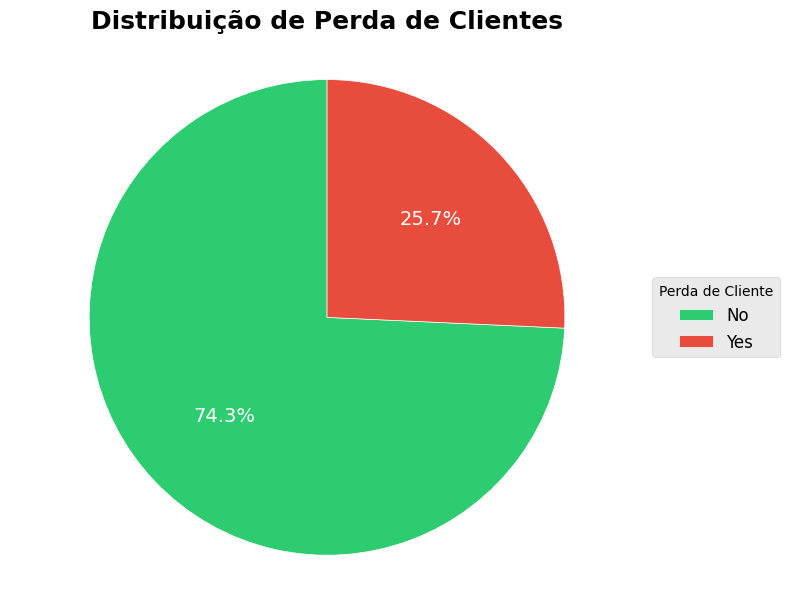

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar o estilo geral do gráfico
plt.style.use('ggplot')  # Estilo mais limpo

# Substituir valores vazios por 'No' (boa prática antes de visualização)
dados_abertos['perda_cliente'] = dados_abertos['perda_cliente'].fillna('No')

# Contagem de valores
contagem = dados_abertos['perda_cliente'].value_counts()

# Cores elegantes e consistentes com UX (verde = cliente retido, vermelho = perdido)
cores = {
    'No': '#2ecc71',   # Verde para "cliente não perdido"
    'Yes': '#e74c3c'   # Vermelho para "cliente perdido"
}
# Pega as cores na mesma ordem da contagem
cores_usadas = [cores[valor] for valor in contagem.index]

# Criar o gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Gráfico de pizza com ajustes visuais
wedges, texts, autotexts = ax.pie(
    contagem,
    labels=contagem.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores_usadas,
    textprops={'fontsize': 14, 'color': 'white'},
    wedgeprops={'edgecolor': 'white'}
)

# Título
ax.set_title('Distribuição de Perda de Clientes', fontsize=18, weight='bold', pad=20)

# Deixar o gráfico redondo
ax.axis('equal')

# Adicionar legenda fora do gráfico
ax.legend(wedges, contagem.index, title='Perda de Cliente', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

# Exibir
plt.tight_layout()
plt.show()


In [ ]:
#Salvar Arquivo Excel
dados_abertos.to_excel('dados_perda_cliente.xlsx', index=False)

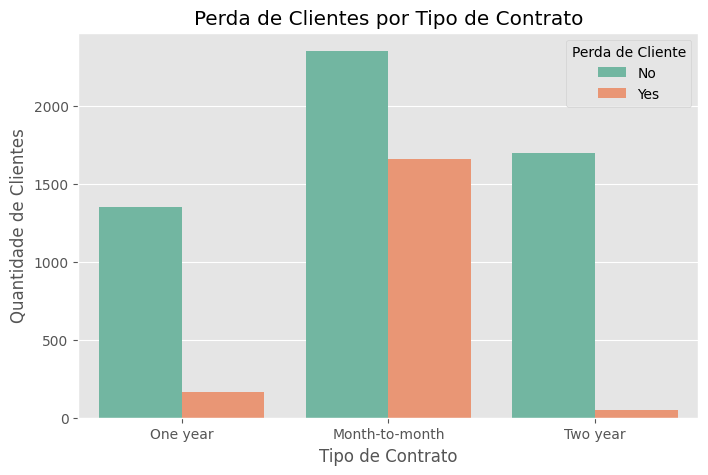

In [ ]:
#Verificar se contratos mensais e perda de cliente (hipótese: contratos mensais têm mais churn?)
plt.figure(figsize=(8,5))
sns.countplot(data=dados_abertos, x='tipo_contrato', hue='perda_cliente', palette='Set2')
plt.title('Perda de Clientes por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Perda de Cliente')
plt.show()


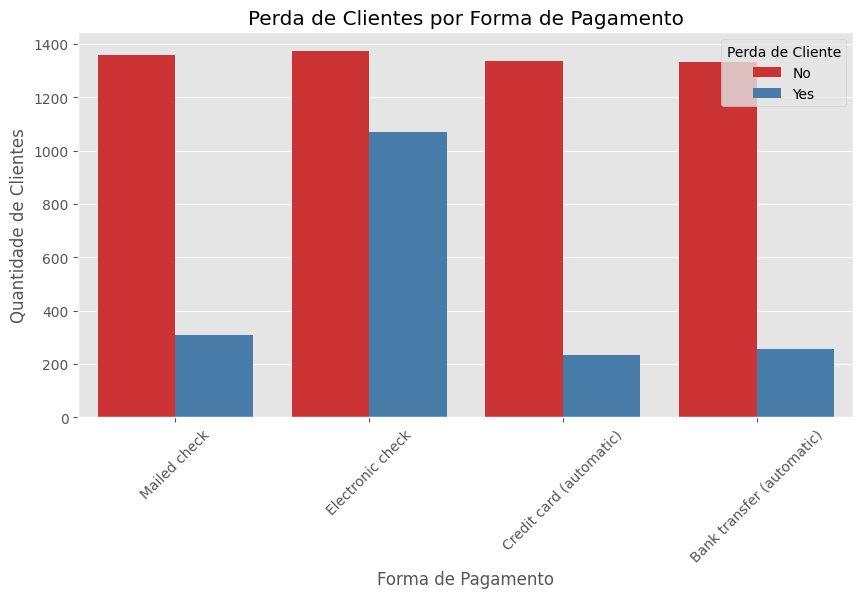

In [ ]:
#Verificar se forma de pagamento tem impacto na perda de cliente
plt.figure(figsize=(10,5))
sns.countplot(data=dados_abertos, x='forma_pagamento', hue='perda_cliente', palette='Set1')
plt.title('Perda de Clientes por Forma de Pagamento')
plt.xlabel('Forma de Pagamento')
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation=45)
plt.legend(title='Perda de Cliente')
plt.show()

<ipython-input-43-cf0eeedd5964>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_abertos, x='perda_cliente', y='meses_contrato', palette='pastel')


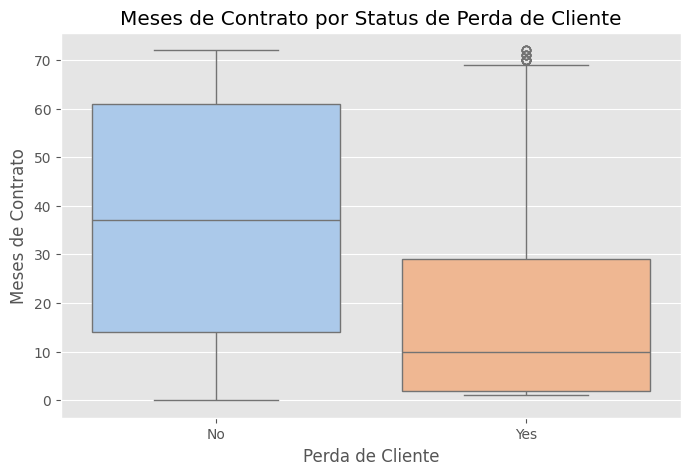

In [ ]:
#Verificar se meses de contrato (hipótese: clientes com menos meses de contrato têm mais perda de cliente?)
plt.figure(figsize=(8,5))
sns.boxplot(data=dados_abertos, x='perda_cliente', y='meses_contrato', palette='pastel')
plt.title('Meses de Contrato por Status de Perda de Cliente')
plt.xlabel('Perda de Cliente')
plt.ylabel('Meses de Contrato')
plt.show()


<ipython-input-48-ba9462eabb5f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_abertos, x='perda_cliente', y='cobrancas_mensais', palette='Set1')


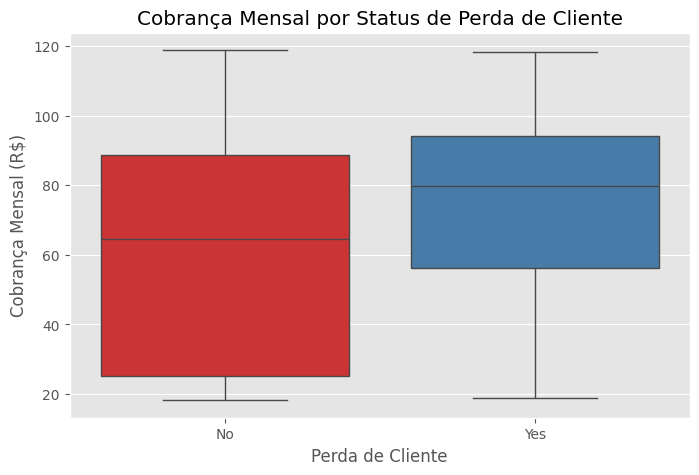

In [ ]:
#Verificar custo mensal da perda de cliente
plt.figure(figsize=(8,5))
sns.boxplot(data=dados_abertos, x='perda_cliente', y='cobrancas_mensais', palette='Set1')
plt.title('Cobrança Mensal por Status de Perda de Cliente')
plt.xlabel('Perda de Cliente')
plt.ylabel('Cobrança Mensal (R$)')
plt.show()



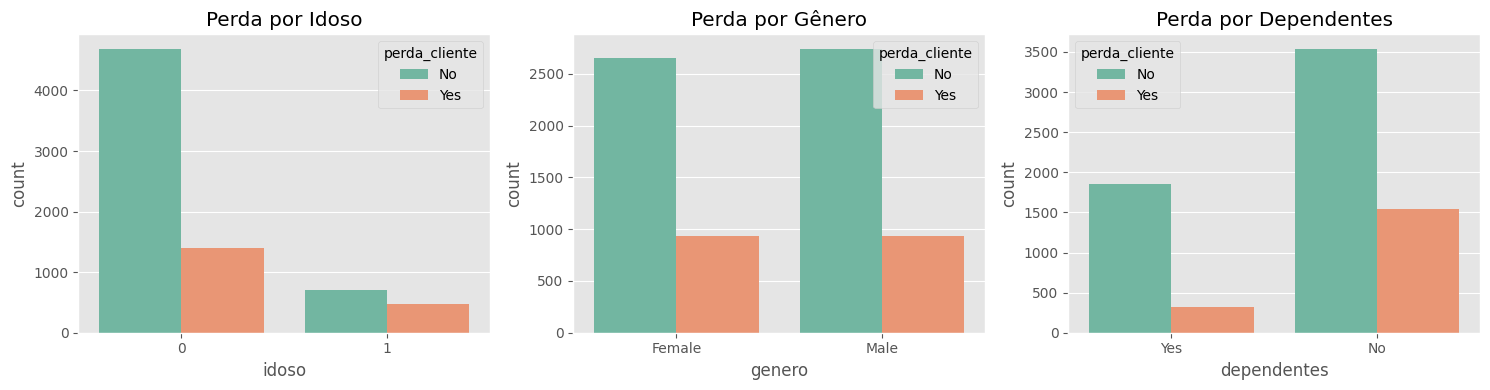

In [ ]:
#Verificar analise de perfil

fig, axs = plt.subplots(1,3, figsize=(15,4))

sns.countplot(data=dados_abertos, x='idoso', hue='perda_cliente', palette='Set2', ax=axs[0])
axs[0].set_title('Perda por Idoso')

sns.countplot(data=dados_abertos, x='genero', hue='perda_cliente', palette='Set2', ax=axs[1])
axs[1].set_title('Perda por Gênero')

sns.countplot(data=dados_abertos, x='dependentes', hue='perda_cliente', palette='Set2', ax=axs[2])
axs[2].set_title('Perda por Dependentes')

plt.tight_layout()
plt.show()


<ipython-input-53-db3ef0d8aa51>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  servicos_bin = dados_abertos[servicos].replace({'Yes': 1, 'No': 0})
<ipython-input-53-db3ef0d8aa51>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_abertos, x='perda_cliente', y='qtd_servicos', palette='Set3')


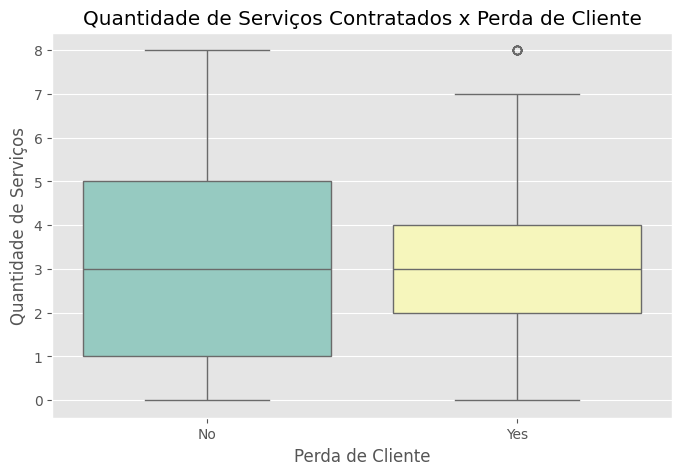

In [ ]:
# Substituir 'Yes' por 1, 'No' por 0 e converter tudo para numérico
servicos_bin = dados_abertos[servicos].replace({'Yes': 1, 'No': 0})

# Converter para numérico (int), valores inválidos viram NaN
servicos_bin = servicos_bin.apply(pd.to_numeric, errors='coerce')

# Substituir NaN por 0 (caso haja valores diferentes)
servicos_bin = servicos_bin.fillna(0)

# Somar por linha
dados_abertos['qtd_servicos'] = servicos_bin.sum(axis=1).astype(int)

# Plot
plt.figure(figsize=(8,5))
sns.boxplot(data=dados_abertos, x='perda_cliente', y='qtd_servicos', palette='Set3')
plt.title('Quantidade de Serviços Contratados x Perda de Cliente')
plt.xlabel('Perda de Cliente')
plt.ylabel('Quantidade de Serviços')
plt.show()


